In [4]:
import pygplates
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('/Users/Simon/GIT/GPlatesReconstructionModel/')

from reconstruction_classes import *
from raster_reconstruction_classes import *

sys.path.append('/Users/Simon/GIT/agegrid-0.1/pttx/')
from pca_utils import grdcontour2feature

%matplotlib inline
%load_ext autoreload
%autoreload 2



Failed to load plotting dependencies


(721,) (361,) (361, 721)


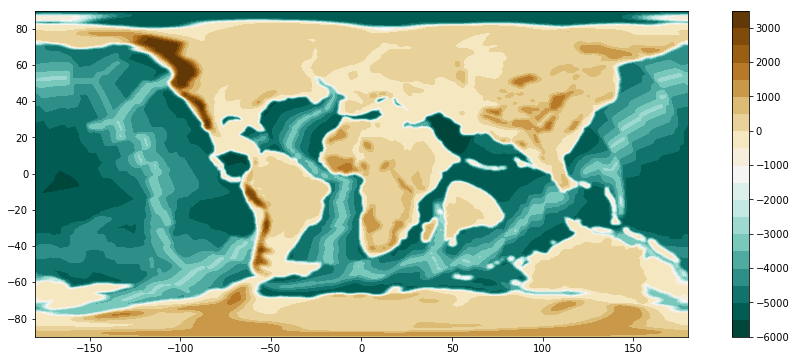

In [5]:
grdfile_template = '/Users/Simon/cloudstor/Shared/Paleotopography_Grids/paleotopobathy_smooth_%0.2fMa.nc'

reconstruction_time = 71
ptopo = GplatesRaster(grdfile_template % reconstruction_time)

print ptopo.gridX.shape, ptopo.gridY.shape, ptopo.gridZ.shape

ptopo.plot()


In [6]:
clevel = 0

polygon_list = []
for reconstruction_time in np.arange(0,201,1):
    
    polygons = grdcontour2feature(grdfile_template % reconstruction_time,clevel)
    
    for polygon in polygons:
        polygon.set_valid_time(reconstruction_time+0.5,reconstruction_time-0.4999)
        polygon_list.append(polygon)
    
pygplates.FeatureCollection(polygon_list).write('paleoshorelines_M2016.gpmlz')
    

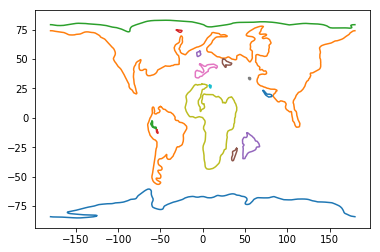

In [7]:
clevel = 0

reconstruction_time = 71

polygon_list = []
    
polygons = grdcontour2feature(grdfile_template % reconstruction_time,clevel)

for polygon in polygons:
    polygon.set_valid_time(reconstruction_time+0.5,reconstruction_time-0.4999)
    polygon_list.append(polygon)
    
#pygplates.FeatureCollection(polygon_list).write('paleoshorelines_M2016.gpmlz')
    
for polygon in polygons:
    
    plt.plot(polygon.get_geometry().to_lat_lon_array()[:,1],polygon.get_geometry().to_lat_lon_array()[:,0])
    

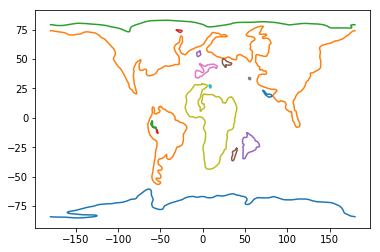

In [9]:
from call_system_command import call_system_command

reconstruction_time = 71

call_system_command(['gmt',
                     'grdcontour',
                     grdfile_template % reconstruction_time,
                     '-C10000',
                     '-Dcontour_%c.txt',
                     '-V'])
    
f = open('./contour_C.txt', 'r')

polygons = []
contourlist = []
for line in f:
    if line[0] == '>':
        if len(contourlist)>0:
            polygons.append(contourlist)
        contourlist = []
    else:
        line = line.split()
        contourlist.append([float(j) for j in line])
        #break
            
for p in polygons:
    plt.plot(zip(*p)[0],zip(*p)[1])

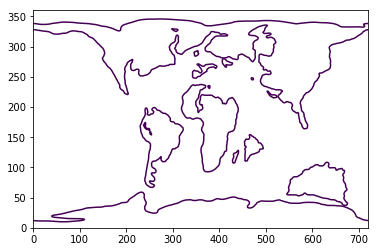

In [10]:
plt.contour(ptopo.gridZ, levels=[0])


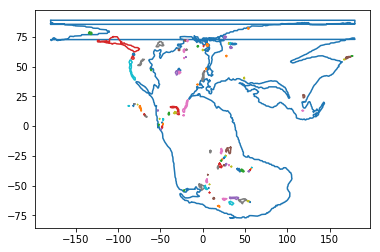

In [11]:
clevel = 0.
polygons = grdcontour2feature('/Users/Simon/Data/GPlates/PublishedModels/Scotese_PaleoAtlas/PaleoDEMS_netcdf/Map40_PALEOMAP_Early_Jurassic_186.8Ma_1deg.nc',clevel)

polygon_list = []
    
for polygon in polygons:
    polygon.set_valid_time(reconstruction_time+0.5,reconstruction_time-0.4999)
    polygon_list.append(polygon)
        
for polygon in polygons:
    
    plt.plot(polygon.get_geometry().to_lat_lon_array()[:,1],polygon.get_geometry().to_lat_lon_array()[:,0])
    


In [12]:
import glob

file_list = glob.glob('/Users/Simon/Data/GPlates/PublishedModels/Scotese_PaleoAtlas/PaleoDEMS_netcdf/*.nc')

time_list = []
for file_name in file_list:
    
    time_string = file_name.split('_')[-2][:-2]

    call_system_command(['gmt',
                         'grdcontour',
                         file_name,
                         '-C+0.5',
                         '-Dcontour_%c.txt',
                         '-V'])
    
    call_system_command(['gmt',
                         'grdmath',
                         'contour_C.txt',
                         'INSIDE',
                         '-R%s' % file_name,
                         '=',
                         './landmasks/landmask_%sMa.nc' % time_string])
    
    
    